In [123]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

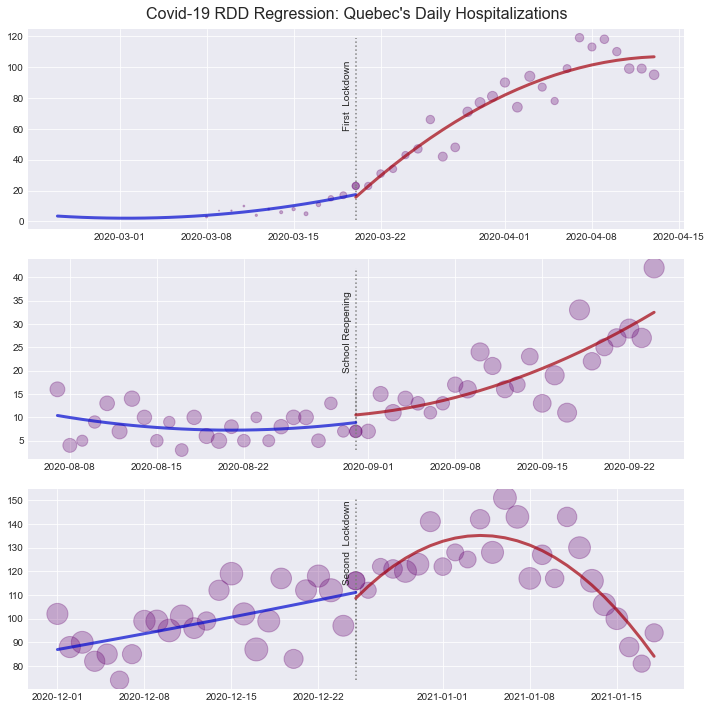

In [124]:
test_df = pd.read_csv(r'C:\Users\David\Documents\code\Module 3\m3-4-rdd-project\Graphique 4.3 - page_principal.csv')
df = pd.read_csv(r'C:\Users\David\Documents\code\Module 3\m3-4-rdd-project\Graphique 3.2 - page_principal.csv')
#The datasets were retrieved here: https://www.inspq.qc.ca/covid-19/donnees

df_ = df.merge(test_df, how='left', left_on="Date d'admission", right_on="Date d'analyse du prélèvement")
df_ = df_.fillna(0)

first_lockdown = pd.to_datetime("2020-03-20 00:00:00")
second_lockdown = pd.to_datetime("2020-12-25 00:00:00")
school_opening = pd.to_datetime("2020-08-31 00:00:00")

def rdd_plot(time, ax, before):
    df = df_
    df['date'] = pd.to_datetime(df["Date d'admission"])
    df['numtoday'] = df['Hors soins intensifs'] + df['Aux soins intensifs']
    
    if before:
        temp_df = df.loc[( df.date > (time - pd.Timedelta(days=25) )) & ( df.date <= time )]
        colour = '#0008cf'
    else:
        temp_df = df.loc[( df.date < (time + pd.Timedelta(days=25) )) & ( df.date >= time )]
        colour = '#a3000c'

    temp_df['day_count'] = range(1, (len(temp_df.index)+1))
    y = temp_df[['numtoday']]
    x = temp_df[['day_count']] 
    X = sm.add_constant(x)
    X['day_count_sqr'] = X['day_count']**2

    model = sm.OLS(y, X).fit(cov_type='HC2')
    yfit = model.predict(X)

    return ax.scatter(temp_df.date, temp_df.numtoday, color='#680672', alpha=0.3, s=(temp_df['Nombre de prélèvements analysés']/75)), ax.plot(temp_df.date, yfit, color=colour, alpha=0.7, linewidth=3), ax.vlines(time, ymin = temp_df.numtoday.min(), ymax = temp_df.numtoday.max(), color='grey', ls ='dotted'), model

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 10))

lock1_before = rdd_plot(first_lockdown, ax1, True)
lock1_after = rdd_plot(first_lockdown, ax1, False)
ax1.text(y=60, x=first_lockdown - pd.Timedelta(days=1), s= 'First  Lockdown', rotation=90)

sch_before = rdd_plot(school_opening, ax2, True)
sch_after = rdd_plot(school_opening, ax2, False)
ax2.text(y=20, x=school_opening - pd.Timedelta(days=1), s= 'School Reopening', rotation=90)

lock2_before = rdd_plot(second_lockdown, ax3, True)
lock2_after = rdd_plot(second_lockdown, ax3, False)
ax3.text(y=115, x=second_lockdown - pd.Timedelta(days=1), s= 'Second  Lockdown', rotation=90)

fig.suptitle("Covid-19 RDD Regression: Quebec's Daily Hospitalizations", size=16)
plt.style.use(['seaborn-darkgrid'])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


In [122]:
#Uncomment to view regression models.

# print(lock1_before[3].summary())
# print(lock1_after[3].summary())
# print(sch_after[3].summary())
# print(sch_before[3].summary())
# print(lock2_before[3].summary())
# print(lock2_after[3].summary())

# Covid-19 RDD Regression: Quebec's Daily Hospitalizations

## Design Considerations

    We chose to use a time span of 25 days on either side of the event. This is because the best available data only includes 25 days before the first lockdown. The timespan was chosen with consideration to the difference between time of infection (as a result of the event) and time of hospitalization. In the interests of visual accuracy, we felt that keeping both sides even and consistent is appropriate to fully understand the trend. 

    The shape of the observations fit a second degree polynomial regression. This allows us to better capture the delayed effect of the events. A simple linear regression does not appropriately distinguish between the increase and decrease following an event.

    The bubble size on the scatterplot indicates the number of Covid-19 tests analyzed on that day. 

## The First Lockdown

    A quick visual analysis demonstrates a slow climbing rate of hospitalizations leading to the event. Following the event, the hospitalizations increase at a greater rate, eventually slowing and leveling out towards the end of the 25 day timespan. We believe that the growth rate does not accurately reflect the effect of the event, due to the lack of data. We can see that the testing rate grows significantly over this time, indicating a drastic change in data availability.

    Prior to the event, the regression model returns the coefficient of the main feature as -0.5894, while the coefficient of the polynomial feature is 0.0449. As a polynomial regression, the positive polynomial coefficient denotes an increasing slope, albeit a small one. The opposite is true of the period following the event. This regression is characterized by a main feature coefficient of 7.5307, which is a much greater slope than prior to the event. At the same time, the coefficient of the polynomial feature is -0.1440, indicating that the rate of hospitalizations is slowing.
    
## School Reopening

    Here, we see a near consistent rate of hospitalizations prior to the event. Following the event, the rate begins to climb.

    The regression model prior to the event returned a p-value of 0.776 on the primary feature. This indicates that we do not have a discerneable trend, but rather a constant. Following the event, the regression returns a coefficient of 0.1859 for our primary feature, and a coefficient of 0.0281 for our polynomial feature. While these are small coefficients, they demonstrate a sharper rate of hospitalizations that is increasing in slope.

## Second Lockdown

    Prior to the event, we see a growing rate of hospitalizations. Following the event, the hospitalizations continue to grow for a short period, followed by a steep downturn. We believe this to be a more accurate depiction of the effect of lockdowns than seen on the first lockdown. The consistent rate of testing indicates more accurate data.

    Prior to the event, the regression model returns a coefficient of 0.9334 on the primary feature and 0.0028 on the polynomial feature. This demonstrates a increasing rate of hospitalizations. Following the event, the regression model returns a coefficient of 5.8043 on the primary feature and -0.2626 on the polynomial feature. This demonstrates a greater rate of hospitalizations immediately following the event, which very quickly transforms into a downward trend.

    Relative to the first lockdown, the second lockdown clearly demonstrates a greater capacity of reducing hospitalizations.